In [3]:
from bnb import *

In [8]:
get_sol_price()

224.3

In [22]:
df = get_historical_prices(interval="1m", limit = 10,coin = "SOL")
df.head(3)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,2024-12-03 12:59:00,224.40,224.42,224.17,224.28,1782.92800000,2024-12-03 12:59:59.999,399936.11322000,1467,1318.84600000,295841.42852000,0
1,2024-12-03 13:00:00,224.28,224.33,224.13,224.30,3272.03900000,2024-12-03 13:00:59.999,733660.09412000,2145,1192.86200000,267444.88155000,0
2,2024-12-03 13:01:00,224.30,224.68,224.29,224.68,1664.62200000,2024-12-03 13:01:59.999,373705.08964000,1419,921.80300000,206938.12249000,0


In [11]:
df_sim = df[["Low", "High","Number of Trades"]]
df_sim.head()

,Low,High,Number of Trades
0,224.06,224.37,1577
1,224.38,224.81,1421
2,224.53,224.72,1250
3,224.36,224.65,1627
4,224.17,224.42,1467


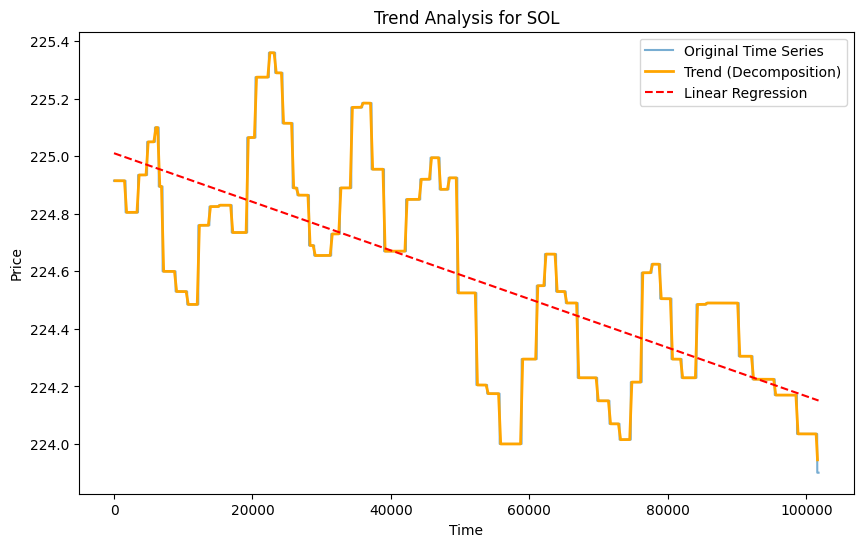

-8.449041785813172e-06
Is the trend going up? False


In [20]:
is_the_trend_up = trend_going_up(coin="SOL", limit=60, plot=True) # Prices of SOL over the last 60 minutes 
print(f'Is the trend going up? {is_the_trend_up}') # Print the result of the function (is_the_trend_up)

# Strategy 0

In [ ]:
# When using any function with client object, you need a private API-key. The public API-key can be used to do statistics.

check = True # Stoping condition for the strategy; This can be improved by writing a stop loss/win function keepRunningStg

while check:
    bal_sol = get_asset_balance("SOL") # Check for your current SOLONA balance
    bal_usdt = get_asset_balance("USDT") # Check for your current USDT balance
    price_sol = get_sol_price() # Get the current SOL price

    if bal_sol >= 0.06: # Add more condition if necessary
        checking = sell_sol(price=round(price_sol * (1+0.2/100),2), amount=0.06) # This is an open order,

    if bal_usdt >= 10 and trend_going_up(coin="SOL", limit=20, plot=False):
        check = buy_sol(price=round(price_sol * (1-0.2/100),2), amount=0.06) # Open order. If an error occurs, check will be False

    time.sleep(2) # Wait two second before running again

    # check = keepRunningStg()